In [20]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [30]:
# Target Search Term
target_terms = ("@BBC", "@CBS", "@cnnbrk",
                "@FoxNews", "@nytimes")
           
# Variable for max_id
oldest_tweet = None
    
# Variables for holding sentiments
sentiment = []

# Loop through all target users
for target in target_terms:
    
    # Counter
    counter = 1
    
    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    # Loop through 5 page of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target, max_id = oldest_tweet)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Print Tweets
#             print("Tweet %s: %s" % (counter, tweet["text"]))

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1

            # Add sentiments for each tweet into a list
            sentiment.append({"Date": tweet["created_at"],
                               "Source": target,
                               "Tweet": tweet["text"],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})

            # Add to counter 
            counter += 1                

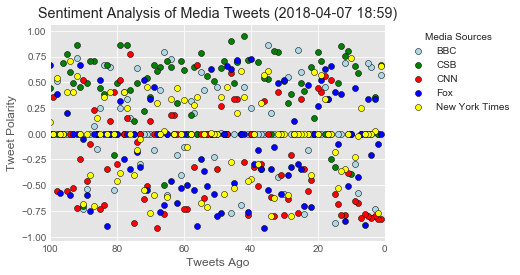

In [59]:
sentiment_pd = pd.DataFrame.from_dict(sentiment)

bbc_pd = pd.DataFrame.from_dict(sentiment_pd.loc[sentiment_pd["Source"] == "@BBC"])
cbs_pd = pd.DataFrame.from_dict(sentiment_pd.loc[sentiment_pd["Source"] == "@CBS"])
cnn_pd = pd.DataFrame.from_dict(sentiment_pd.loc[sentiment_pd["Source"] == "@cnnbrk"])
fox_pd = pd.DataFrame.from_dict(sentiment_pd.loc[sentiment_pd["Source"] == "@FoxNews"])
nytimes_pd = pd.DataFrame.from_dict(sentiment_pd.loc[sentiment_pd["Source"] == "@nytimes"])

bbc = plt.scatter(bbc_pd["Tweets Ago"], bbc_pd["Compound"], marker="o", facecolors="lightblue", edgecolors="black", alpha=1, label="BBC")
cbs = plt.scatter(cbs_pd["Tweets Ago"], cbs_pd["Compound"], marker="o", facecolors="green", edgecolors="black", alpha=1, label="CSB")
cnn = plt.scatter(cnn_pd["Tweets Ago"], cnn_pd["Compound"], marker="o", facecolors="red", edgecolors="black", alpha=1, label="CNN")
fox = plt.scatter(fox_pd["Tweets Ago"], fox_pd["Compound"], marker="o", facecolors="blue", edgecolors="black", alpha=1, label="Fox")
nytimes = plt.scatter(nytimes_pd["Tweets Ago"], nytimes_pd["Compound"], marker="o", facecolors="yellow", edgecolors="black", alpha=1, label="New York Times")

plt.legend(handles=[bbc, cbs, cnn, fox, nytimes], loc='upper right', bbox_to_anchor=(1.4,1), fancybox=True, title="Media Sources")

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlim([x_vals.max(),0]) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()